In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('res_tr.csv')

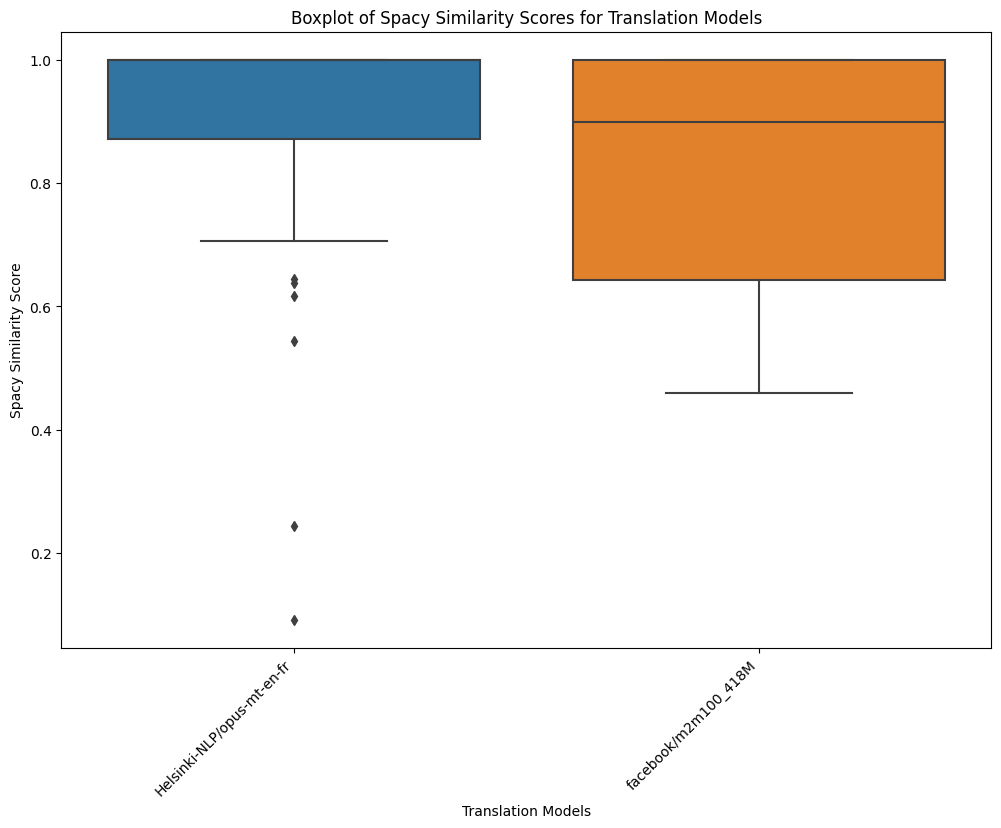

In [12]:
plt.figure(figsize=(12, 8))

model_name = df['tr_model_name_en_to_fr']
sns.boxplot(x=model_name, y='spacy_sim', data=df)
plt.title('Boxplot of Spacy Similarity Scores for Translation Models')
plt.xlabel('Translation Models')
plt.ylabel('Spacy Similarity Score')
plt.xticks(rotation=45, ha='right') 
plt.show()

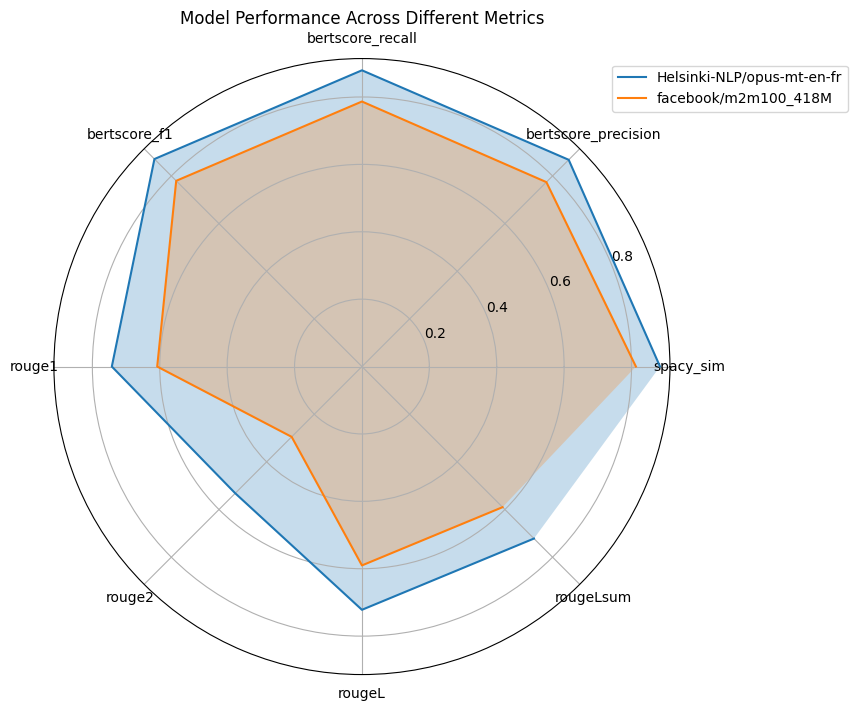

In [13]:
# Extract metrics
metrics = ['spacy_sim', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']

# Create a radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Number of metrics
num_metrics = len(metrics)

for qa_model, group in df.groupby('tr_model_name_en_to_fr'):
    values = group[metrics].mean().values
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

    # Plot
    ax.plot(angles, values, label=qa_model)
    ax.fill(angles, values, alpha=0.25)

# Set the number of labels and their positions
ax.set_thetagrids(angles * 180/np.pi, labels=metrics)

ax.set_title('Model Performance Across Different Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()

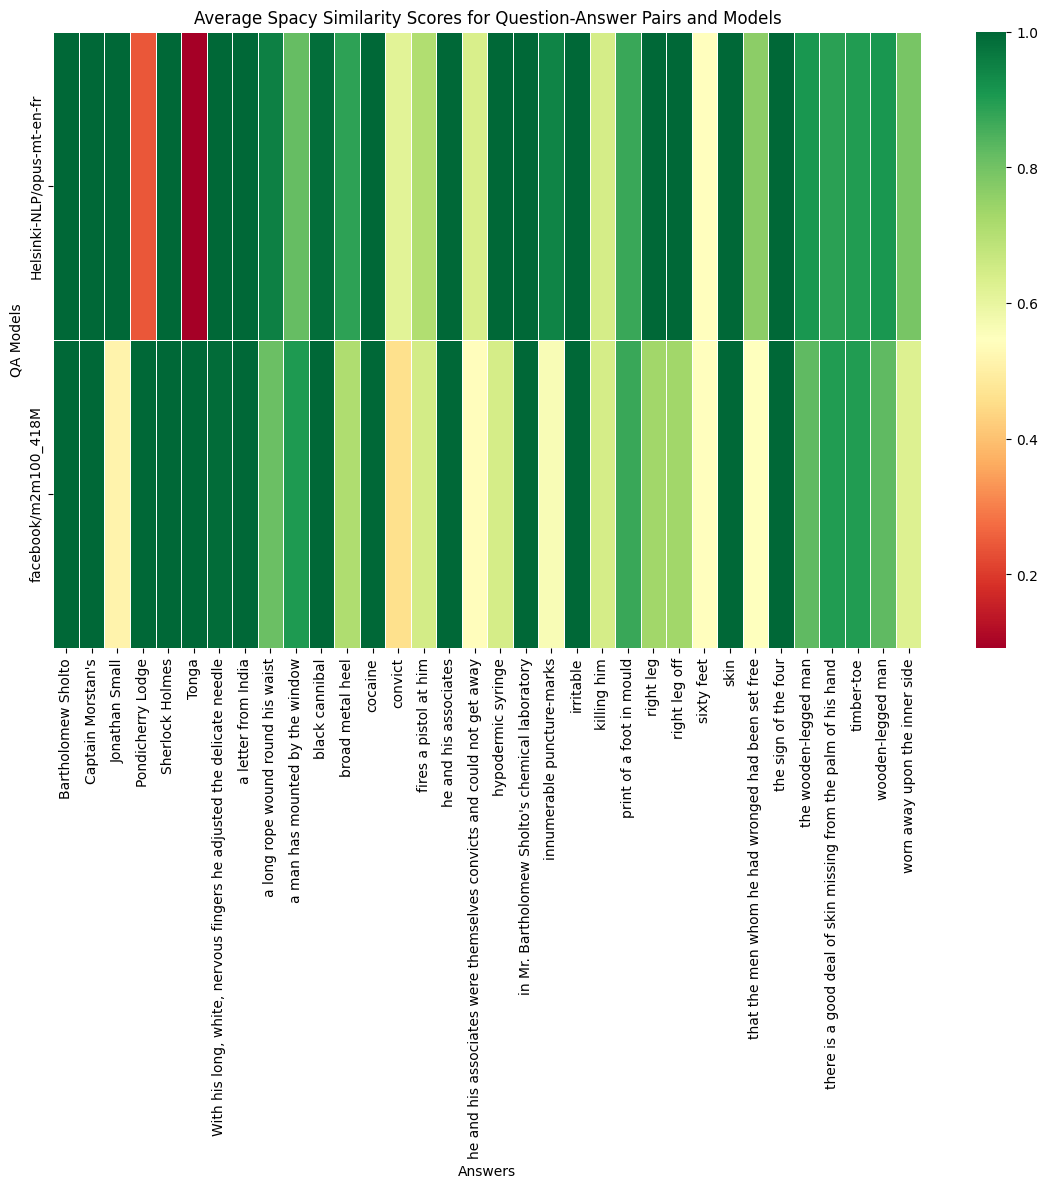

In [17]:
pivot_df = df.pivot_table(index='tr_model_name_en_to_fr', columns='qa_answer_pred', values='spacy_sim', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='RdYlGn', fmt=".2f", linewidths=.5)
plt.title('Average Spacy Similarity Scores for Question-Answer Pairs and Models')
plt.xlabel('Answers')
plt.ylabel('QA Models')
plt.show()

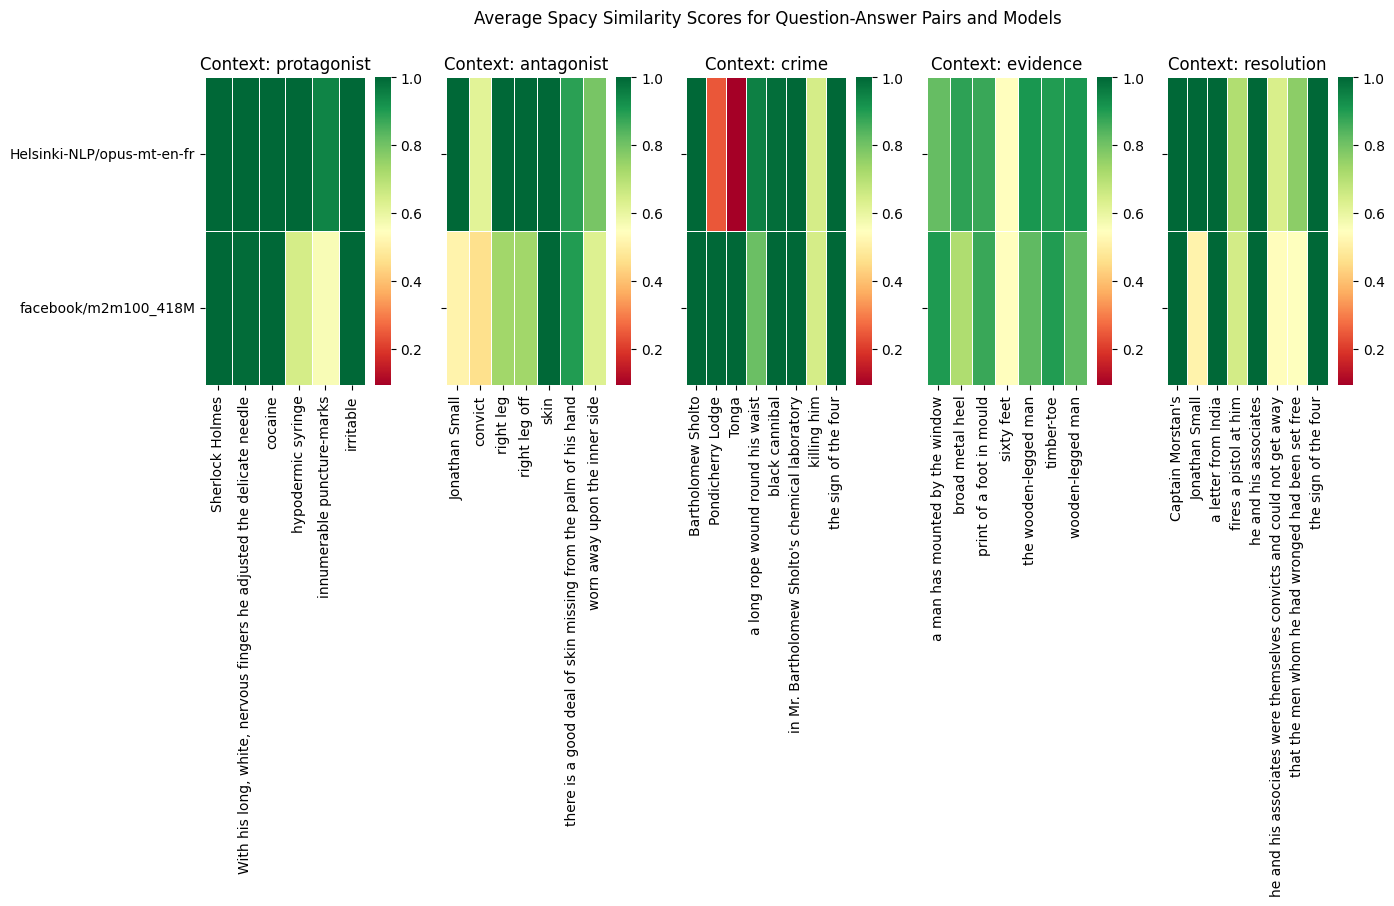

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Step 1: Get unique contexts
unique_contexts = df['ctx_name'].unique()

# Step 2: Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(unique_contexts), figsize=(15, 4), sharey=True)

vmin = df['spacy_sim'].min()
vmax = df['spacy_sim'].max()

# Step 3: Plot heatmaps for each context
for i, context in enumerate(unique_contexts):
    context_df = df[df['ctx_name'] == context]
    pivot_df = context_df.pivot_table(index='tr_model_name_en_to_fr', columns='qa_answer_pred', values='spacy_sim', aggfunc='mean')
    sns.heatmap(pivot_df, cmap='RdYlGn', fmt=".2f", linewidths=.5, ax=axes[i], vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Context: {context}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Common title
fig.suptitle('Average Spacy Similarity Scores for Question-Answer Pairs and Models', y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


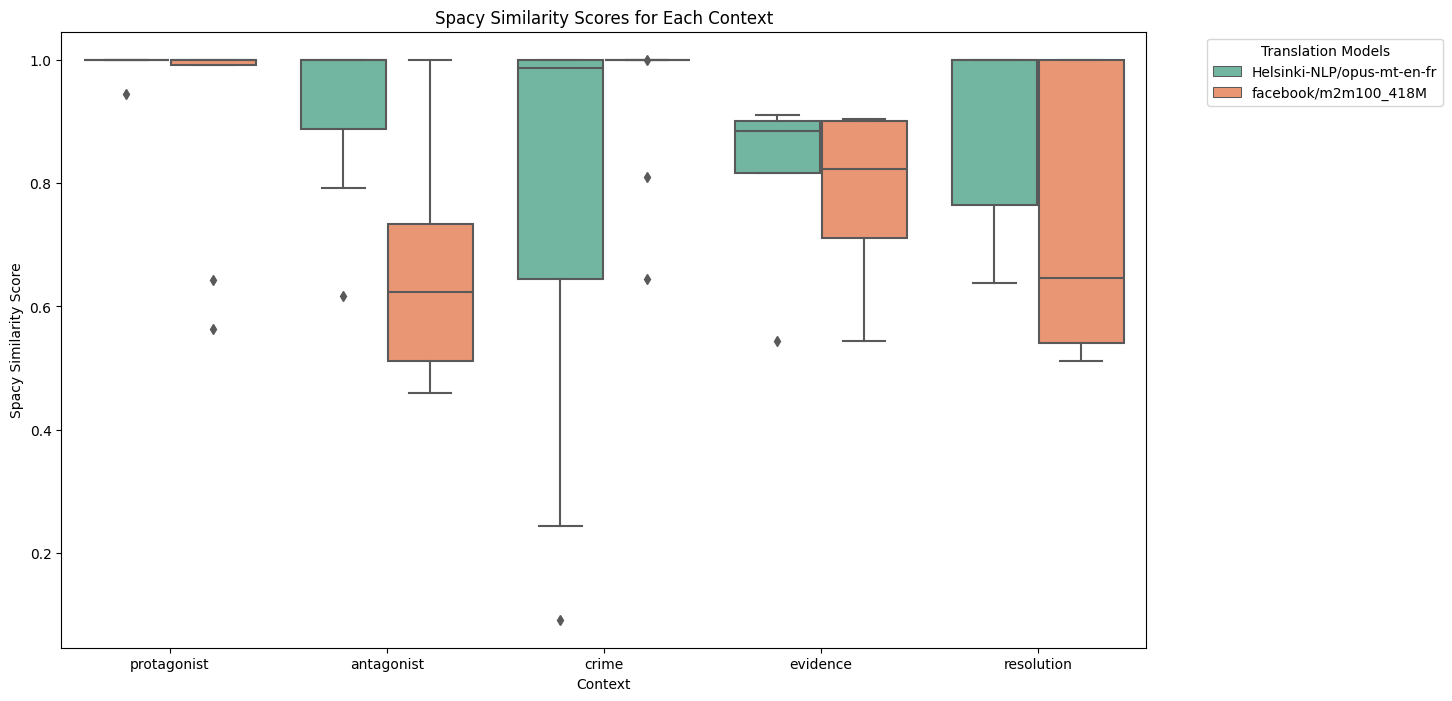

In [16]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='ctx_name', y='spacy_sim', hue='tr_model_name_en_to_fr', data=df, palette='Set2')
plt.title('Spacy Similarity Scores for Each Context')
plt.xlabel('Context')
plt.ylabel('Spacy Similarity Score')
plt.legend(title='Translation Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


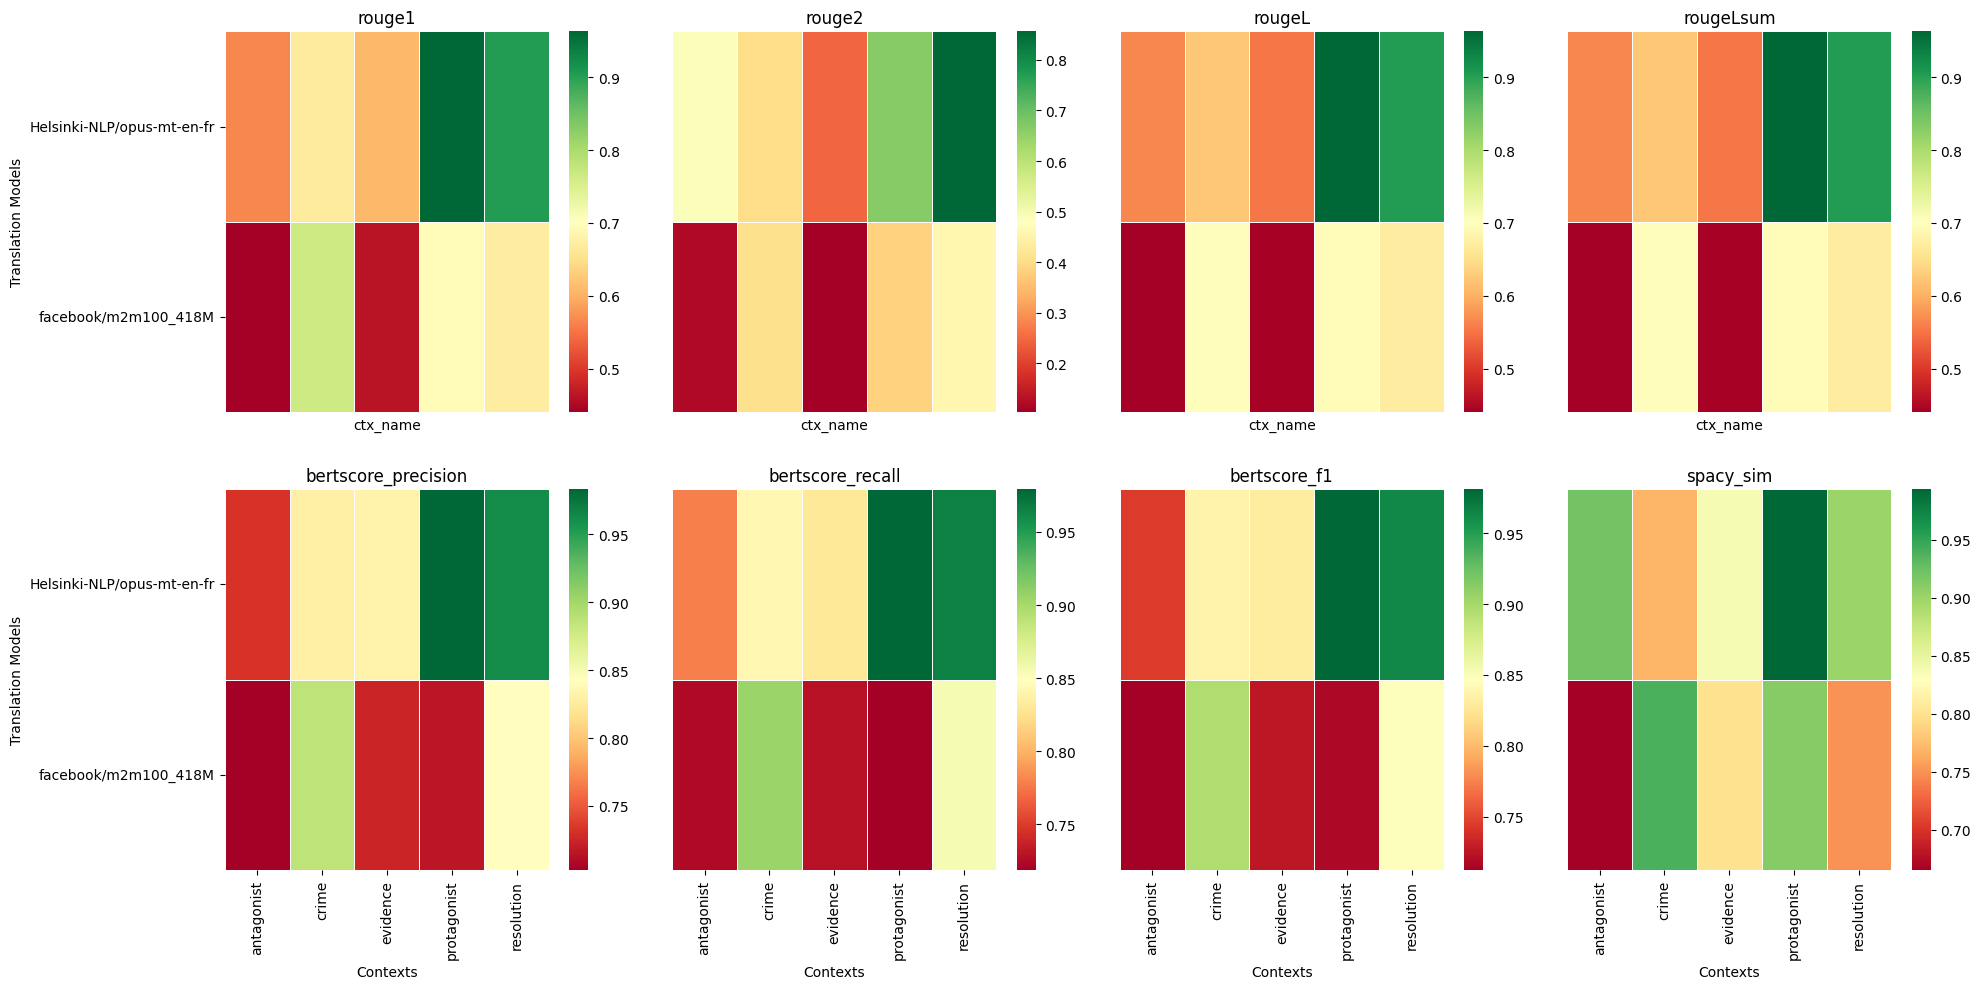

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum','bertscore_precision', 'bertscore_recall', 'bertscore_f1', 'spacy_sim']

# Create a single figure outside the loop
plt.figure(figsize=(20, 10))

# Iterate through metrics
for metric in metrics:
    # Create subplots
    plt.subplot(2, 4, metrics.index(metric) + 1)

    # Pivot table for the current metric
    pivot_df = df.pivot_table(index='tr_model_name_en_to_fr', columns='ctx_name', values=metric, aggfunc='mean')

    # Plot heatmap
    sns.heatmap(pivot_df, cmap='RdYlGn', fmt=".2f", linewidths=.5)

    # Set y-axis ticks and labels only for the leftmost subplot
    if metrics.index(metric) == 0 or metrics.index(metric) == 4:
        plt.ylabel('Translation Models')
    else:
        plt.yticks([])

    if metrics.index(metric) not in [0,1,2,3]:
      plt.xlabel('Contexts')
    else:
      plt.xticks([])
    if metrics.index(metric) not in [0,4]:
      plt.ylabel('')
    plt.title(f'{metric}')

# Add a common y-label to the leftmost subplot
# plt.suptitle('Average score of each metric across different contexts')

# Adjust layout with space between subplots
plt.tight_layout(h_pad=2.5, w_pad=2.5)
plt.show()
